In [68]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

colors = ["cornflowerblue", "indianred", "darkseagreen", "plum"]

df = pd.read_csv('Data/housing.csv')
target = 'median_house_value'
df = pd.get_dummies(df)

In [69]:
# Regresion lineal simple total rooms, guarda predicciones en df
X = df[['total_rooms']]
y = df[target]

model = linear_model.LinearRegression().fit(X, y)

df['predicciones lineal'] = model.predict(X)

In [70]:
# Regresion polinomial grado 2
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)  # Transformar X a características polinómicas

# Ajustar el modelo de regresión lineal
model = linear_model.LinearRegression()
model.fit(X_poly, y)

df['predicciones_poly2'] = model.predict(X_poly)


In [71]:
# Regresion polinomial grado 3
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)  # Transformar X a características polinómicas

# Ajustar el modelo de regresión lineal
model = linear_model.LinearRegression()
model.fit(X_poly, y)

df['predicciones_poly3'] = model.predict(X_poly)


In [72]:
# Regresion polinomial grado 4
degree = 4
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)  # Transformar X a características polinómicas

# Ajustar el modelo de regresión lineal
model = linear_model.LinearRegression()
model.fit(X_poly, y)

df['predicciones_poly4'] = model.predict(X_poly)

In [73]:
# Bivariado de total rooms 
df['bins'] = pd.qcut(df['total_rooms'], q=10, labels=False) + 1

In [74]:
grouped = df.groupby('bins').mean()

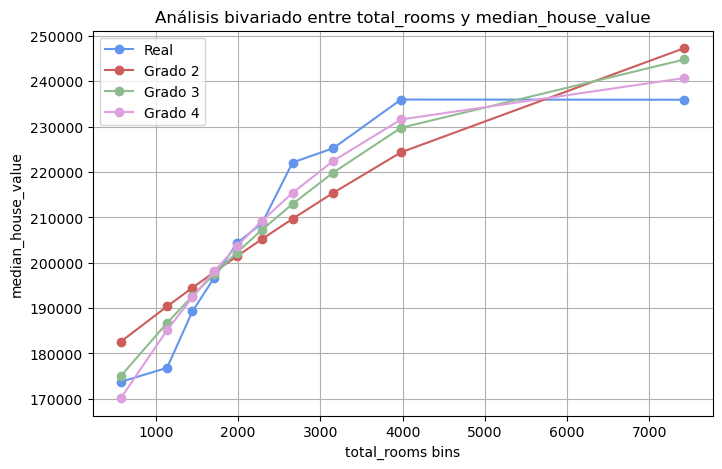

In [75]:
plt.figure(figsize=(8,5))
plt.plot(grouped[X.keys()[0]].values, grouped.median_house_value.values, color=colors[0], marker='o', label="Real")
plt.plot(grouped.total_rooms.values, grouped.predicciones_poly2.values, color=colors[1], marker='o', label="Grado 2")
plt.plot(grouped.total_rooms.values, grouped.predicciones_poly3.values, color=colors[2], marker='o', label="Grado 3")
plt.plot(grouped.total_rooms.values, grouped.predicciones_poly4.values, color=colors[3], marker='o', label="Grado 4")
plt.xlabel(f"{X.keys()[0]} bins")
plt.ylabel("median_house_value")
plt.title(f"Análisis bivariado entre {X.keys()[0]} y median_house_value")
plt.grid()
plt.legend()
plt.show()

### Crea una regresión polinomial con todos y has cross validación, obten el R2 

In [76]:
df = pd.read_csv('Data/housing.csv')
target = 'median_house_value'
df = pd.get_dummies(df)

df['total_bedrooms'] = df.total_bedrooms.fillna(df.total_bedrooms.mean())

In [77]:
# Simple  
df['density'] = df['households'] / df['population']

In [78]:
X = df.copy()
X = X.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42
)

model = linear_model.LinearRegression().fit(X_train, y_train)
predicciones = model.predict(X_test)
r2_score(y_pred=predicciones, y_true=y_test)

0.6257351821159713

In [79]:
# Grado 2
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)  # Transformar X a características polinómicas
X_test_poly = poly_features.fit_transform(X_test) 

# Ajustar el modelo de regresión lineal
model = linear_model.LinearRegression()
model.fit(X_train_poly, y_train)

predicciones = model.predict(X_test_poly)
r2_score(y_pred=predicciones, y_true=y_test)

0.6620359405729486

In [80]:
# Grado 3
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)  # Transformar X a características polinómicas
X_test_poly = poly_features.fit_transform(X_test) 

# Ajustar el modelo de regresión lineal
model = linear_model.LinearRegression()
model.fit(X_train_poly, y_train)

predicciones = model.predict(X_test_poly)
r2_score(y_pred=predicciones, y_true=y_test)

-3.010005345991517

In [23]:
# Grado 4
